# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Data/Social_Network_Ads.csv')
display(dataset.head(), len(dataset))

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


400

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
## might aswell use minkowski as its the general metric ( choose p = 2 to use euclidea metric)
## for this demo test i will use the appropiate standerd number of neighbors and not bother tuning
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

## Predicting a new result

In [10]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [11]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]]


## Making the Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[44  3]
 [ 5 28]]
0.9


## Visualise the Model on training and test data

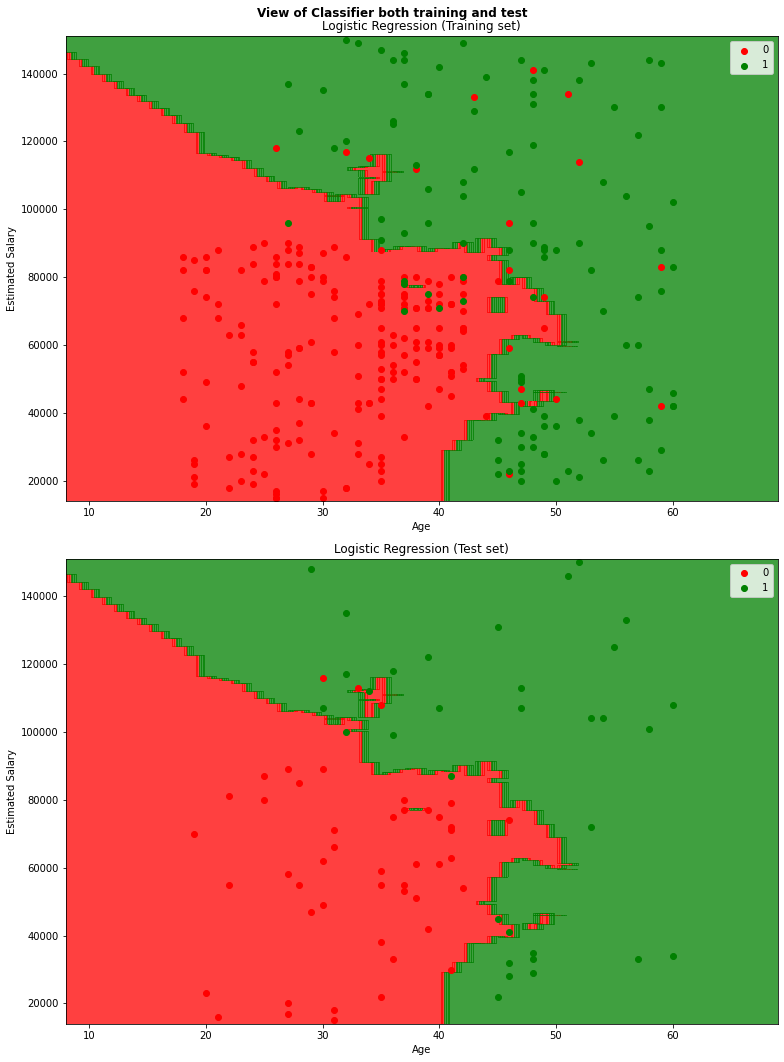

In [15]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(11, 15))
ax = fig.subplots(nrows=2, ncols=1)


X_set1, y_set1 = sc.inverse_transform(X_train), y_train
X_set2, y_set2 = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set1[:, 0].min() - 10, stop = X_set1[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set2[:, 1].min() - 1000, stop = X_set2[:, 1].max() + 1000, step = 1))

ax[0].contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

ax[1].contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

ax[0].set_xlim(X1.min(), X1.max())
ax[0].set_ylim(X2.min(), X2.max())
ax[1].set_xlim(X1.min(), X1.max())
ax[1].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set1)):
    ax[0].scatter(X_set1[y_set1 == j, 0], X_set1[y_set1 == j, 1], c = [ListedColormap(('red', 'green'))(i)], label = j)
    
for i, j in enumerate(np.unique(y_set2)):
    ax[1].scatter(X_set2[y_set2 == j, 0], X_set2[y_set2 == j, 1], c = [ListedColormap(('red', 'green'))(i)], label = j)
    
plt.suptitle('View of Classifier both training and test', fontweight='bold')

ax[0].set_title('Logistic Regression (Training set)')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Estimated Salary')
ax[0].legend()

ax[1].set_title('Logistic Regression (Test set)')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Estimated Salary')
ax[1].legend()

plt.tight_layout()

plt.show()

## checking the same for different metrics and neighbour values

### n = 3 p = 2

[[44  3]
 [ 5 28]]
0.9


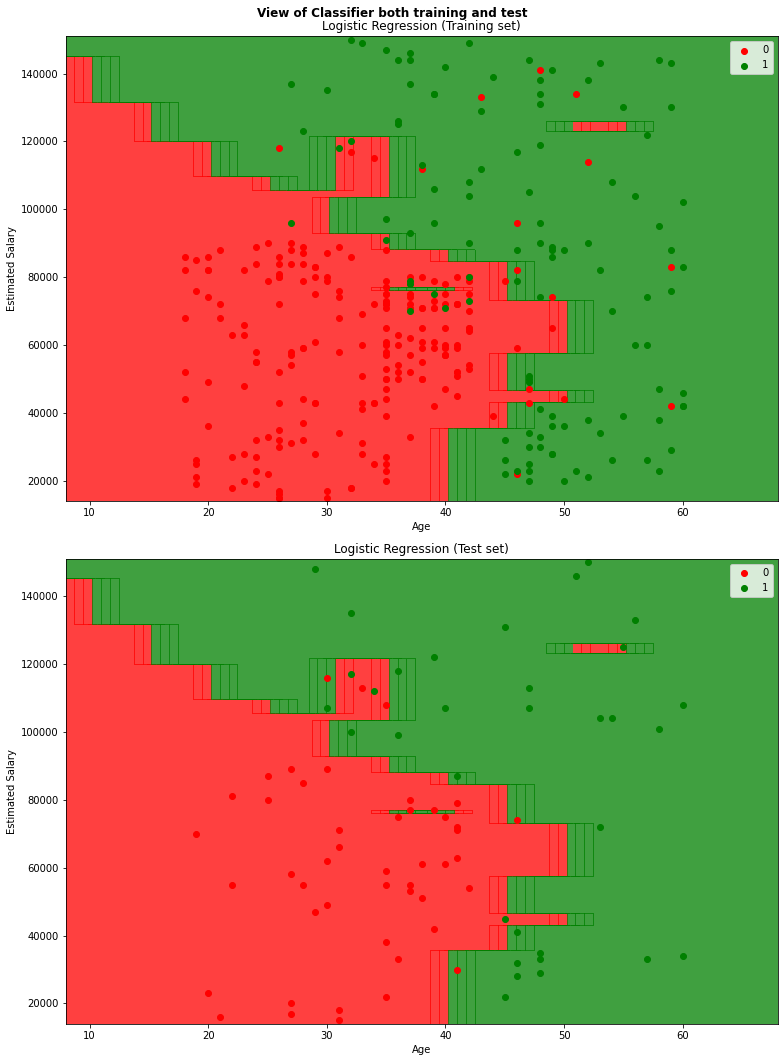

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

## we will use a very rough display to speed up the code as its slow
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(11, 15))
ax = fig.subplots(nrows=2, ncols=1)


X_set1, y_set1 = sc.inverse_transform(X_train), y_train
X_set2, y_set2 = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set1[:, 0].min() - 10, stop = X_set1[:, 0].max() + 10, step = 5),
                     np.arange(start = X_set2[:, 1].min() - 1000, stop = X_set2[:, 1].max() + 1000, step = 5))

ax[0].contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

ax[1].contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

ax[0].set_xlim(X1.min(), X1.max())
ax[0].set_ylim(X2.min(), X2.max())
ax[1].set_xlim(X1.min(), X1.max())
ax[1].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set1)):
    ax[0].scatter(X_set1[y_set1 == j, 0], X_set1[y_set1 == j, 1], c = [ListedColormap(('red', 'green'))(i)], label = j)
    
for i, j in enumerate(np.unique(y_set2)):
    ax[1].scatter(X_set2[y_set2 == j, 0], X_set2[y_set2 == j, 1], c = [ListedColormap(('red', 'green'))(i)], label = j)
    
plt.suptitle('View of Classifier both training and test', fontweight='bold')

ax[0].set_title('Logistic Regression (Training set)')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Estimated Salary')
ax[0].legend()

ax[1].set_title('Logistic Regression (Test set)')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Estimated Salary')
ax[1].legend()

plt.tight_layout()

plt.show()

### n = 7 p = 2

[[44  3]
 [ 5 28]]
0.9


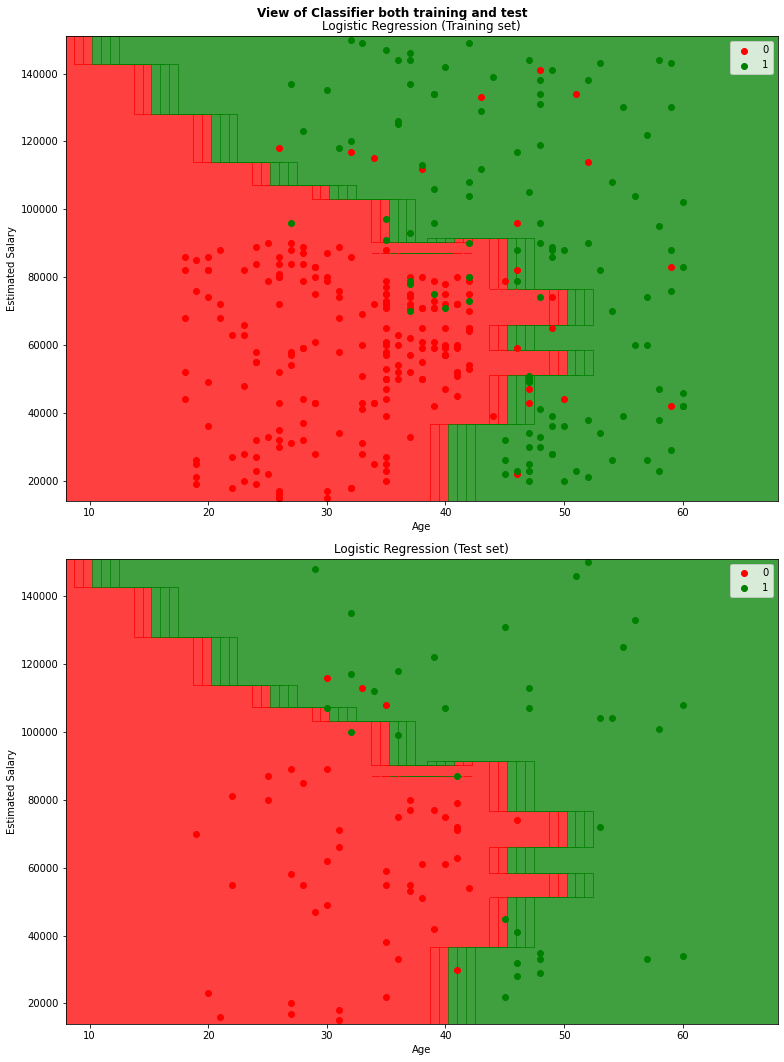

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

## we will use a very rough display to speed up the code as its slow
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(11, 15))
ax = fig.subplots(nrows=2, ncols=1)


X_set1, y_set1 = sc.inverse_transform(X_train), y_train
X_set2, y_set2 = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set1[:, 0].min() - 10, stop = X_set1[:, 0].max() + 10, step = 5),
                     np.arange(start = X_set2[:, 1].min() - 1000, stop = X_set2[:, 1].max() + 1000, step = 5))

ax[0].contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

ax[1].contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

ax[0].set_xlim(X1.min(), X1.max())
ax[0].set_ylim(X2.min(), X2.max())
ax[1].set_xlim(X1.min(), X1.max())
ax[1].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set1)):
    ax[0].scatter(X_set1[y_set1 == j, 0], X_set1[y_set1 == j, 1], c = [ListedColormap(('red', 'green'))(i)], label = j)
    
for i, j in enumerate(np.unique(y_set2)):
    ax[1].scatter(X_set2[y_set2 == j, 0], X_set2[y_set2 == j, 1], c = [ListedColormap(('red', 'green'))(i)], label = j)
    
plt.suptitle('View of Classifier both training and test', fontweight='bold')

ax[0].set_title('Logistic Regression (Training set)')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Estimated Salary')
ax[0].legend()

ax[1].set_title('Logistic Regression (Test set)')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Estimated Salary')
ax[1].legend()

plt.tight_layout()

plt.show()

### n = 5 p = 1 (manhatten)

[[44  3]
 [ 5 28]]
0.9


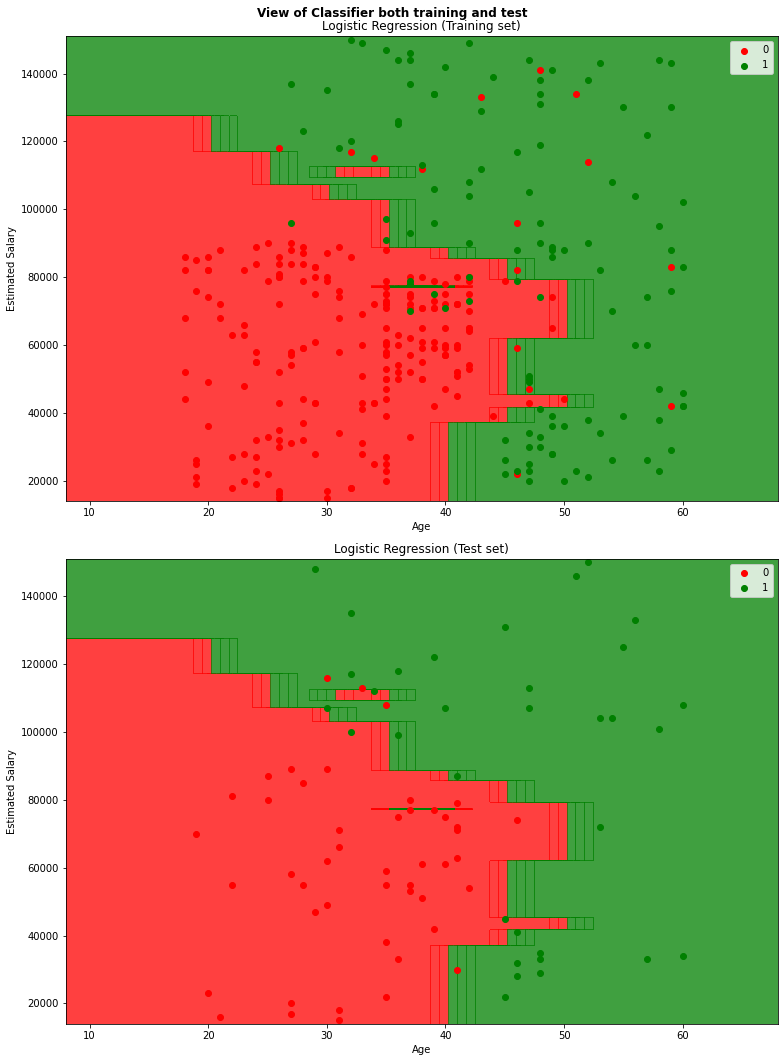

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

## we will use a very rough display to speed up the code as its slow
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(11, 15))
ax = fig.subplots(nrows=2, ncols=1)


X_set1, y_set1 = sc.inverse_transform(X_train), y_train
X_set2, y_set2 = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set1[:, 0].min() - 10, stop = X_set1[:, 0].max() + 10, step = 5),
                     np.arange(start = X_set2[:, 1].min() - 1000, stop = X_set2[:, 1].max() + 1000, step = 5))

ax[0].contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

ax[1].contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

ax[0].set_xlim(X1.min(), X1.max())
ax[0].set_ylim(X2.min(), X2.max())
ax[1].set_xlim(X1.min(), X1.max())
ax[1].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set1)):
    ax[0].scatter(X_set1[y_set1 == j, 0], X_set1[y_set1 == j, 1], c = [ListedColormap(('red', 'green'))(i)], label = j)
    
for i, j in enumerate(np.unique(y_set2)):
    ax[1].scatter(X_set2[y_set2 == j, 0], X_set2[y_set2 == j, 1], c = [ListedColormap(('red', 'green'))(i)], label = j)
    
plt.suptitle('View of Classifier both training and test', fontweight='bold')

ax[0].set_title('Logistic Regression (Training set)')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Estimated Salary')
ax[0].legend()

ax[1].set_title('Logistic Regression (Test set)')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Estimated Salary')
ax[1].legend()

plt.tight_layout()

plt.show()

### n = 5 p = 20

[[44  3]
 [ 5 28]]
0.9


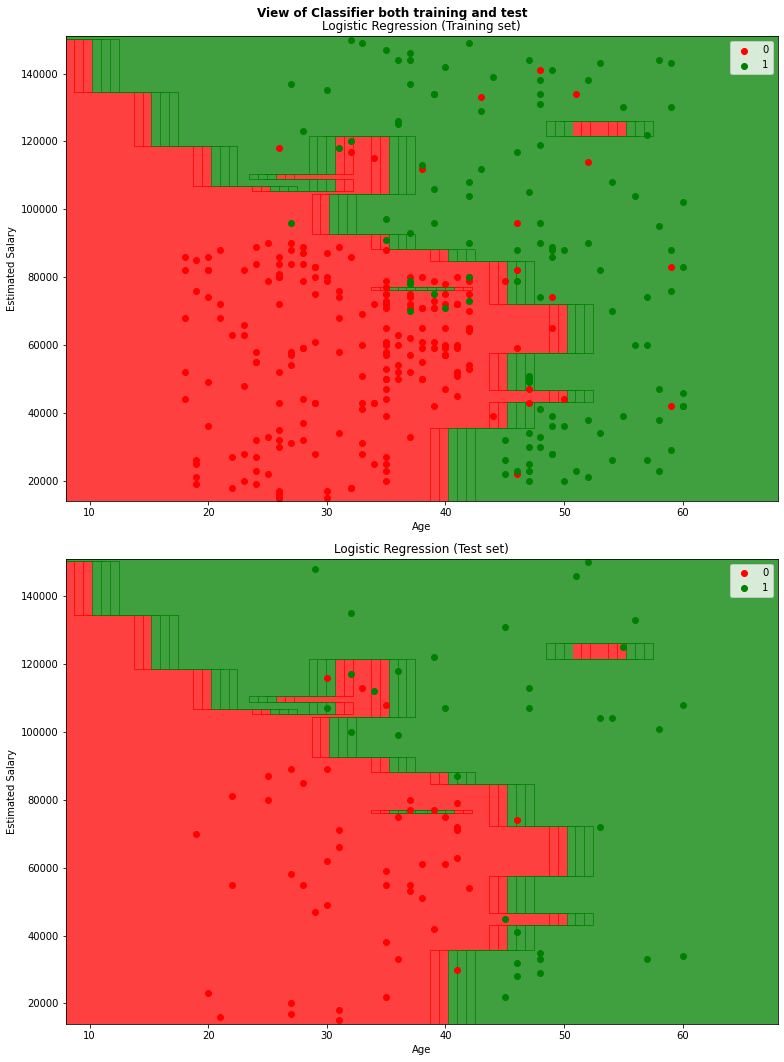

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 20)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

## we will use a very rough display to speed up the code as its slow
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(11, 15))
ax = fig.subplots(nrows=2, ncols=1)


X_set1, y_set1 = sc.inverse_transform(X_train), y_train
X_set2, y_set2 = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set1[:, 0].min() - 10, stop = X_set1[:, 0].max() + 10, step = 5),
                     np.arange(start = X_set2[:, 1].min() - 1000, stop = X_set2[:, 1].max() + 1000, step = 5))

ax[0].contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

ax[1].contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

ax[0].set_xlim(X1.min(), X1.max())
ax[0].set_ylim(X2.min(), X2.max())
ax[1].set_xlim(X1.min(), X1.max())
ax[1].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set1)):
    ax[0].scatter(X_set1[y_set1 == j, 0], X_set1[y_set1 == j, 1], c = [ListedColormap(('red', 'green'))(i)], label = j)
    
for i, j in enumerate(np.unique(y_set2)):
    ax[1].scatter(X_set2[y_set2 == j, 0], X_set2[y_set2 == j, 1], c = [ListedColormap(('red', 'green'))(i)], label = j)
    
plt.suptitle('View of Classifier both training and test', fontweight='bold')

ax[0].set_title('Logistic Regression (Training set)')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Estimated Salary')
ax[0].legend()

ax[1].set_title('Logistic Regression (Test set)')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Estimated Salary')
ax[1].legend()

plt.tight_layout()

plt.show()

all in all there was very little change besides the shape of the boundry this is due to the data not being large enough for such a change to be visual as the algorithm performs quite well on the data regardless of its parameters